Dataset

In [2]:
# salary_data.csv
# https://mitu.co.in/dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
salary = pd.read_csv('Salary_Data.csv')

In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [10]:
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


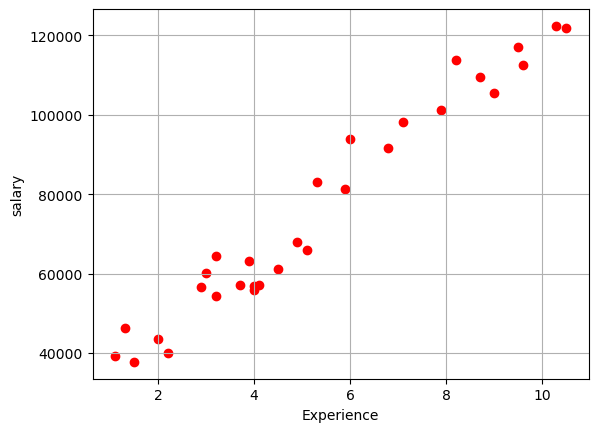

In [48]:
plt.xlabel("Experience")
plt.ylabel("salary")
plt.grid()
plt.scatter(salary.YearsExperience, salary.Salary, color='r')

In [54]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression()

In [38]:
regressor.fit(salary[['YearsExperience']], salary.Salary)

LinearRegression()

In [44]:
# m
regressor.coef_

array([9449.96232146])

In [46]:
# c
regressor.intercept_

25792.20019866871

In [50]:
regressor.predict([[6]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([82491.9741274])

In [52]:
regressor.predict([[8]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101391.89877031])

### Cross Validation

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x = salary[['YearsExperience']]
y = salary['Salary']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [65]:
x_train.shape

(22, 1)

In [67]:
x_test.shape

(8, 1)

In [69]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [71]:
regressor.fit(x_train, y_train)

LinearRegression()

In [73]:
regressor.coef_

array([9379.71049195])

In [75]:
regressor.intercept_

26986.691316737248

In [77]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [79]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

In [81]:
y_pred = regressor.predict(x_test)

In [87]:
result = pd.DataFrame({
    'Experience': x_test.values.flatten(),
    'Actual Salary': y_test,
    'Salary predicted by Algorithm': y_pred
})

In [89]:
result

,Experience,Actual Salary,Salary predicted by Algorithm
2,1.5,37731.0,41056.257055
28,10.3,122391.0,123597.709384
13,4.1,57081.0,65443.504334
10,3.9,63218.0,63567.562235
26,9.5,116969.0,116093.940990
24,8.7,109431.0,108590.172597
27,9.6,112635.0,117031.912039
11,4.0,55794.0,64505.533285


#### Mean Absolute Error

In [92]:
abs(y_test - y_pred).mean()

3508.5455930660555

In [96]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

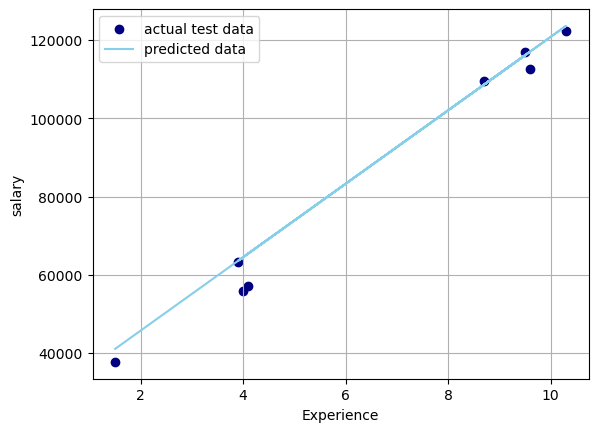

In [106]:
plt.xlabel("Experience")
plt.ylabel("salary")
plt.grid()
plt.scatter(x_test, y_test, color='navy', label= 'actual test data')
plt.plot(x_test, y_pred, color='skyblue', label= 'predicted data')
plt.legend()

In [108]:
y_pred = regressor.predict(x)

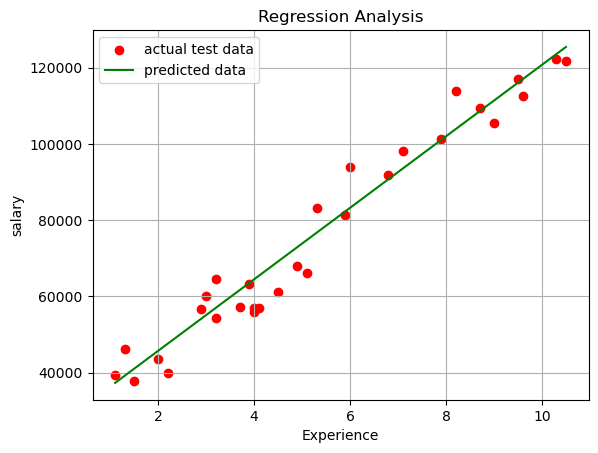

In [112]:
plt.title('Regression Analysis')
plt.xlabel("Experience")
plt.ylabel("salary")
plt.grid()
plt.scatter(x, y, color='r', label= 'actual test data')
plt.plot(x, y_pred, color='g', label= 'predicted data')
plt.legend()

In [114]:
y_pred

array([ 37304.37285788,  39180.31495627,  41056.25705466,  45746.11230063,
        47622.05439902,  54187.85174338,  55125.82279258,  57001.76489096,
        57001.76489096,  61691.62013694,  63567.56223533,  64505.53328452,
        64505.53328452,  65443.50433372,  69195.38853049,  72947.27272727,
        74823.21482566,  76699.15692405,  82326.98321922,  83264.95426841,
        90768.72266197,  93582.63580955, 101086.40420311, 103900.31735069,
       108590.17259667, 111404.08574425, 116093.94099022, 117031.91203942,
       123597.70938378, 125473.65148217])

In [122]:
regressor.predict([[12]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [124]:
regressor.predict([[15]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [126]:
regressor.predict([[20]])

C:\Users\duasp\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([214580.90115566])

#### r-squared error (to find the accuracy of model)

In [130]:
regressor.score(x,y)

0.955975487542377

In [138]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)
#accuracy

0.955975487542377

In [140]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, y_pred)

4724.65759422699

In [142]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y, y_pred)

0.07278049089506371

In [146]:
# mean squared error
np.mean((y-y_pred)**2)

31983775.798633035

In [148]:
# root mean squared error
np.sqrt(np.mean((y-y_pred)**2))

5655.4200373299445

In [150]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

31983775.798633035